In [ ]:
import pandas as pd
import numpy as np

In [ ]:
steel_df = pd.read_csv('Steel Manufacturing.csv')

In [ ]:
steel_df.head()

,Heating Temperature,Cooling Temperature,Solid Mold Size,Coke %,Minerals %,Production Type,Inclusions,Steel Strength
0,147,127,51,39,61,Unit 2,13.83,962
1,180,123,49,64,36,Unit 1,9.34,928
2,155,141,66,71,29,Unit 2,12.84,1142
3,177,136,38,40,60,Unit 1,15.08,691
4,147,123,57,48,52,Unit 1,9.57,973


In [ ]:
# Create Feature and Target variables
X = steel_df.drop(columns=['Inclusions', 'Steel Strength'], axis=1)
y_inclusions = steel_df['Inclusions']
y_strength = steel_df['Steel Strength']

# Split Data

In [ ]:
from sklearn.model_selection import train_test_split

X_train_inclusions, X_test_inclusions, y_train_inclusions, y_test_inclusions = train_test_split(X, y_inclusions, test_size=0.2)
X_train_strength, X_test_strength, y_train_strength, y_test_strength = train_test_split(X, y_strength, test_size=0.2)

# Preprocess Data

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

numeric_features = X.select_dtypes(exclude=['object']).columns
categorical_features = X.select_dtypes(include=['object']).columns


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features),
    ],
    remainder='passthrough'
)


model_inclusion = Pipeline([
    ('preprocessor', preprocessor),
    ('model_inclusion', RandomForestRegressor())
])

model_strength = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor())
])


# Fit model

In [ ]:
model_inclusion.fit(X_train_inclusions, y_train_inclusions)
model_strength.fit(X_train_strength, y_train_strength)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  Index(['Heating Temperature', 'Cooling Temperature', 'Solid Mold Size',
       'Coke %', 'Minerals %'],
      dtype='object')),
                                                 ('cat', OneHotEncoder(),
                                                  Index(['Production Type'], dtype='object'))])),
                ('model', RandomForestRegressor())])

# Evaluate Model performance

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

pred_inclusions = model_inclusion.predict(X_test_inclusions)
pred_strength = model_strength.predict(X_test_strength)

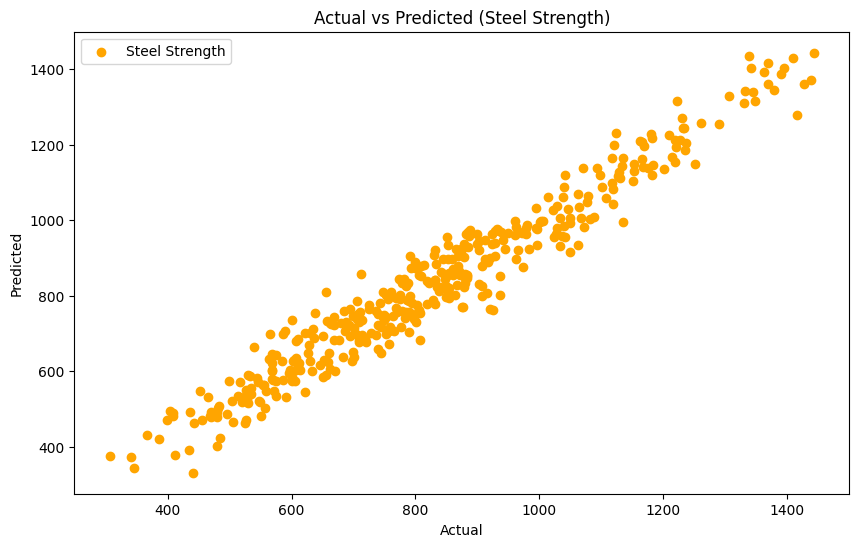

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(y_test_strength, pred_strength, color='orange', label='Steel Strength')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title('Actual vs Predicted (Steel Strength)')
ax.legend()
plt.show()

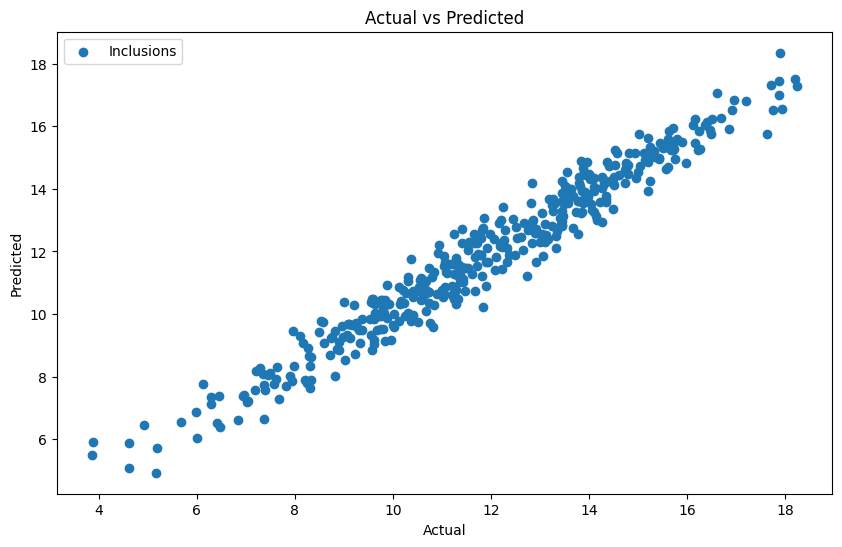

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(y_test_inclusions, pred_inclusions, label='Inclusions')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title('Actual vs Predicted')
ax.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse_inclusions = mean_squared_error(y_test_inclusions, pred_inclusions)
r2_inclusions = r2_score(y_test_inclusions, pred_inclusions)

mse_strength = mean_squared_error(y_test_strength, pred_strength)
r2_strength = r2_score(y_test_strength, pred_strength)

print(f'Inclusions Model - MSE: {mse_inclusions:.2f}, R-squared: {r2_inclusions:.2f}')
print(f'Strength Model - MSE: {mse_strength:.2f}, R-squared: {r2_strength:.2f}')

Inclusions Model - MSE: 0.39, R-squared: 0.95
Strength Model - MSE: 2931.49, R-squared: 0.95
